In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv('./zoo.csv')
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
data = data.drop('animal_name', axis = 1)

In [5]:
# target value
target_col = 'class_type'

In [8]:
y = data[target_col]
X = data.drop(target_col, axis = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [21]:
#paramter
pars = list(range(3,12,2))
print(pars)

results = {}
error_rate = []
# train_test
for n in pars:
    print("k = ", n)
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accu = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='micro')
    error_rate.append(np.mean(preds != y_test))
    print(classification_report(y_test, preds))
    print('-'*20)
    results[n] = f1

k =  3
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         0
           7       1.00      0.50      0.67         2

    accuracy                           0.94        16
   macro avg       0.80      0.70      0.73        16
weighted avg       1.00      0.94      0.96        16

--------------------
k =  5
              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         4
           4       0.75      1.00      0.86         3
           5       0.00      0.00      0.00         0
           7       1.00      0.50      0.67         2

    accuracy                           0.88        16
   macro avg       0.75      0.67      0.69        16
weighted avg       0.95      0.88      0.9

C:\Users\phant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\phant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\phant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

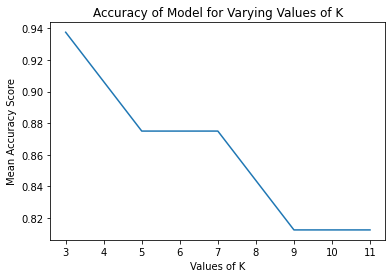

In [23]:
lists = sorted(results.items()) # sorted by key, return a list of tuples
par, acc = zip(*lists) # unpack a list of pairs into two tuples

plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.plot(par, acc)
plt.show()

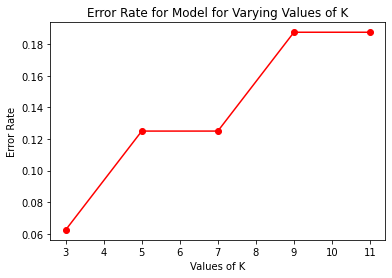

In [25]:
# Plot n values and average accuracy scores
plt.plot(pars, error_rate, color='r', marker = 'o')

# Added titles and adjust dimensions
plt.title('Error Rate for Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")

plt.show()